# EXTRACTION AND EXPLORATORY DATA ANALYSIS ON SPOTIFY PLAYLIST DATASET

# Introduction

<div class="alert alert-block alert-success">
<b>Introduction:</b> Daniel Ek and Martin Lorentzon created Spotify, a non-free Swedish audio streaming and media services provider, on April 23, 2006. As of March 2022, it had over 422 million monthly active users, including 182 million paid members, making it one of the top music streaming service providers.

This project demonstrates how to extract a Spotify playlist dataset and perform exploratory data analysis on the features. This project, in particular, extracts data from a playlist called "Hot Naija Hits" and investigates the features of the songs.
</div>

# Content

__Extracting Spotify Playlist__

__Importing Libraries__

__Reading Dataset__

__Eyeballing The Dataset__

__Feature Metadata__

__Checking The Data Shape__

__Retrieving Data Information__

__Checking For Duplicates__

__Checking for Missing Values__

__Dropping The 'Unnamed: 0' Column__

__Renaming Columns__

__Sampling Data__

__Summary Satistics__

__EDA__:

> _Song Popularity_

> _Song Acousticness_

> _Song Danceability_

> _Song Energy (Top 10)_

> _Song Energy (Bottom 10)_

> _Song Instrumentalness_

> _Song Liveness_

> _Song Loudness_

> _Song Speechiness_
 
> _Song Tempo_
  
> _Time_Signature_
  
> __Value Counts of Artist Name__
  
> __Exploring Features Distribution__


# Extracting Spotify Playlist

In [55]:
# Install the spotify library
'pip install spotipy'

'pip install spotipy'

In [56]:
# Import the required libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

In [57]:
# setup the client credentials 
client_id = 'b2ee402e22f14628a919f3d35d86f86f'
client_secret = '34af9ea77b154e23a85e43f051fdc5e7'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [58]:
# Define a funtion to extract songs IDS
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('31b6xgnzc4dmfx6pi76zobaekxaq', '6omtoYWO4IMVgUNF0vNI8L')

In [59]:
# Print number of song ids
print(len(ids))
# Print the song ids
print(ids)

100
['2PDgArI0p7UkeYgXWuqpmh', '1XUf5lpeTQbrohZWdx6Sbz', '2SaRkvUkzNzL39fBB2hLpt', '4lVEVXrlQlXPdYWMGTwrFe', '54j7Q5sw9AJurAYxwt8NOY', '6MF7A93KnwAffYjUw0G19O', '3WoBRKYJIle4V5Z583J7pJ', '1NnNx2eoTcUgkwgLUGpbFP', '6O6rb1Zj4x594G0OVLZjRt', '1rWxa2PtZT1S1mr6Jxm86B', '4eZZofkV1OQ9GDqAgHqNpA', '4yyyYP5qaio5SHdlDu82Py', '738fvtQnIL1V5WyAm2zuQw', '3aDnVO9Omzz4EytKraWg9o', '3tX7lJbV0Z3ClDa6KHqxVM', '3AlrChzEA6jnHkQvDuhq0c', '1enk1SGVDSYragvMwcn7s8', '7vECPXXTtBOScFvOyOE8jn', '0oro9g7M96WJt3FqtHnKIl', '2XuLnQELesgnkCGZbSJHO0', '6hd8cGU3nXykhV7LC6Kz1l', '5yOzTV0lLUDjjrPFzimeLI', '13ulmsrmNsMMuqX61yJIU5', '33ZP3qMoSn7Qm8aJhGbPK0', '7CcwGX8YiQqil6YcW4sXJ5', '4WLdlAi4KBDNRxaq3GnRYH', '4HdSvJOkkBuiVUrL9eXJ2K', '324J3aYrBBDhL7HHwuCATW', '54uTcxbdMVetUnP6WFoJzE', '4w6r299QMnin39PgRFRYXk', '34CKU5kPRpvJPCqBZ5224w', '1XOgCKKNasUdNOyIQINdEA', '1rgPaNbruePcgLEX3rse9j', '6VaZy3CmYDMafPC6myZDeZ', '5FtWjKVBTMklN2yCP9UhF6', '7pXNFEzqeZB8rIbcFtYTop', '1YpGByjEamqwgni31e3Ylu', '4PgMRk7oJmRzJOngQlONBa', '4vHVuk

In [60]:
# Define funtion to extract song features
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']

  track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track

In [61]:
# loop over track ids 
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df.to_csv("spotify.csv", sep = ',')

In [62]:
df.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Last Last,Last Last,Burna Boy,2022-05-12,172342,65,0.795,0.1310,0.565,0.000000,0.0802,-4.457,0.0948,87.925,4
1,Stand Strong (feat. Sunday Service Choir),Stand Strong (feat. Sunday Service Choir),Davido,2022-05-13,182791,60,0.474,0.3790,0.691,0.000016,0.1350,-5.026,0.0980,94.622,4
2,PALAZZO,PALAZZO,SPINALL,2022-05-13,186002,59,0.819,0.0534,0.659,0.000000,0.0435,-9.024,0.0973,116.054,4
3,Overloading (OVERDOSE),Overloading (OVERDOSE),Mavins,2022-05-13,205000,51,0.546,0.4840,0.611,0.001490,0.1010,-9.459,0.1720,104.059,4
4,Thai Food,Thai Food,Ria Sean,2022-05-13,150720,26,0.559,0.2980,0.524,0.000012,0.2020,-7.904,0.2470,111.123,5


# Importing Libraries

In [63]:
import opendatasets as od
import os
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Reading Dataset

In [64]:
data_spotify = pd.read_csv('spotify.csv')

# Eyeballing The Dataset

In [65]:
data_spotify

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,Last Last,Last Last,Burna Boy,2022-05-12,172342,65,0.795,0.1310,0.565,0.000000,0.0802,-4.457,0.0948,87.925,4
1,1,Stand Strong (feat. Sunday Service Choir),Stand Strong (feat. Sunday Service Choir),Davido,2022-05-13,182791,60,0.474,0.3790,0.691,0.000016,0.1350,-5.026,0.0980,94.622,4
2,2,PALAZZO,PALAZZO,SPINALL,2022-05-13,186002,59,0.819,0.0534,0.659,0.000000,0.0435,-9.024,0.0973,116.054,4
3,3,Overloading (OVERDOSE),Overloading (OVERDOSE),Mavins,2022-05-13,205000,51,0.546,0.4840,0.611,0.001490,0.1010,-9.459,0.1720,104.059,4
4,4,Thai Food,Thai Food,Ria Sean,2022-05-13,150720,26,0.559,0.2980,0.524,0.000012,0.2020,-7.904,0.2470,111.123,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Sáré,Sáré,Simi,2022-02-18,154000,53,0.861,0.2630,0.815,0.146000,0.0477,-5.641,0.0504,111.055,4
96,96,MMM (feat. MohBad & Rexxie),MMM (feat. MohBad & Rexxie),DJ Tunez,2022-02-18,164000,40,0.805,0.3350,0.853,0.317000,0.3690,-5.114,0.2060,120.995,4
97,97,Commander,Commander,Blaqbonez,2022-02-18,158400,50,0.817,0.3600,0.690,0.018700,0.1070,-6.979,0.1900,99.873,4
98,98,Fall,Fall,Olakira,2022-02-18,186992,50,0.894,0.2290,0.569,0.026200,0.1260,-7.278,0.0542,111.005,4


# Feature Metadata

__Name__: Track name

__Album__: Album name

__Artist__: Artist name

__Release_date__: Date the song was released

__Length__: Duration of the song in ms

__Popularity__: Popularity on the Spotify platform

__Danceability__: The higher the value, the easier it is to dance to this song

__Acousticness__: The higher the value the more acoustic the song is

__Energy__: The higher the value, the more energetic the song is

__Instrumentalness__: The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

__Liveness__: The higher the value, the more likely the song is

__Loudness__: The higher the value, the louder the song

__Speechiness__: The higher the value the more spoken word the song contains

__Tempo__: The higher the value the higher the tempo of the song

__Time_signature__: Specifies how many beats are in each bar (or measure)

# Checking Data Shape

In [66]:
data_spotify.shape

(100, 16)

In [67]:
data_spotify.dtypes

Unnamed: 0            int64
name                 object
album                object
artist               object
release_date         object
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object

# Retrievng Data Information

In [68]:
data_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   name              100 non-null    object 
 2   album             100 non-null    object 
 3   artist            100 non-null    object 
 4   release_date      100 non-null    object 
 5   length            100 non-null    int64  
 6   popularity        100 non-null    int64  
 7   danceability      100 non-null    float64
 8   acousticness      100 non-null    float64
 9   energy            100 non-null    float64
 10  instrumentalness  100 non-null    float64
 11  liveness          100 non-null    float64
 12  loudness          100 non-null    float64
 13  speechiness       100 non-null    float64
 14  tempo             100 non-null    float64
 15  time_signature    100 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory usa

In [69]:
for i, v in enumerate(data_spotify.columns):
    print(i, v)

0 Unnamed: 0
1 name
2 album
3 artist
4 release_date
5 length
6 popularity
7 danceability
8 acousticness
9 energy
10 instrumentalness
11 liveness
12 loudness
13 speechiness
14 tempo
15 time_signature


# Checking For Duplicates 

In [70]:
data_spotify.duplicated().sum()

0

# Checking For Missing Values 

In [71]:
data_spotify.isnull().sum()

Unnamed: 0          0
name                0
album               0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

# Dropping the 'Unnamed: 0' Column

In [72]:
data_spotify.drop(['Unnamed: 0'], axis = 1, inplace= True)

# Renaming Columns

In [73]:
data_spotify= data_spotify.rename(columns = {'name': 'Song_Name', 'album':'Album_Name', 'artist':'Artist_Name', 'release_date': 'Release_Date', 'length': 'Length', 'popularity': 'Song_Popularity', 'danceability': 'Danceability', 'acousticness':'Acousticness', 'energy': 'Energy', 'instrumentalness': 'Instrumentalness', 'liveness': 'Liveness', 'loudness':'Loudness', 'speechiness':'Speechiness', 'tempo':'Tempo', 'time_signature':'Time_Signature'}, inplace = False)

# Sampling Data

In [74]:
data_spotify.sample(5)

,Song_Name,Album_Name,Artist_Name,Release_Date,Length,Song_Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_Signature
92,Revival,Revival,SESS,2022-02-25,155530,22,0.730,0.0285,0.688,0.001430,0.0908,-6.666,0.107,105.950,4
26,Long Time,Long Time,Ceeza Milli,2022-04-14,191482,40,0.492,0.2430,0.754,0.000000,0.1030,-7.800,0.252,115.753,5
27,Oro Aje,Oro Aje,Oritse Femi,2022-04-22,238680,35,0.537,0.0623,0.883,0.000152,0.2950,-3.952,0.101,115.063,4
81,IDG,V,Aṣa,2022-02-25,187500,59,0.698,0.3820,0.694,0.000289,0.0754,-4.388,0.226,197.840,4
32,Walangolo,Walangolo,DJ Neptune,2022-04-08,224842,53,0.887,0.1260,0.651,0.000000,0.0633,-6.707,0.108,95.006,4


# Summary Statistics

In [75]:
data_spotify.describe()

,Length,Song_Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_Signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,177559.120000,44.470000,0.733450,0.298677,0.665150,0.021440,0.147898,-6.577360,0.150713,110.684710,4.090000
std,29000.166631,12.319366,0.138608,0.222358,0.128365,0.074637,0.098017,1.854973,0.100497,21.651251,0.428646
min,63760.000000,16.000000,0.352000,0.002650,0.218000,0.000000,0.043500,-11.870000,0.033900,60.620000,3.000000
25%,160052.500000,36.750000,0.600000,0.130250,0.575000,0.000000,0.091850,-7.660500,0.077725,99.121500,4.000000
50%,177540.000000,44.000000,0.778000,0.265000,0.661500,0.000053,0.112500,-6.636500,0.131000,110.025000,4.000000
75%,194333.250000,53.000000,0.858000,0.385250,0.760250,0.001445,0.161250,-5.270750,0.205250,115.984250,4.000000
max,238680.000000,71.000000,0.937000,0.888000,0.929000,0.468000,0.508000,-2.333000,0.594000,197.840000,5.000000


# Song Popularity 

In [76]:
SongPopularity = data_spotify[['Song_Name','Song_Popularity', 'Album_Name', 'Artist_Name', 'Release_Date']].nlargest(10,['Song_Popularity']).set_index('Artist_Name')
SongPopularity

,Song_Name,Song_Popularity,Album_Name,Release_Date
Artist_Name,,,,
Black Sherif,Kwaku the Traveller,71,Kwaku the Traveller,2022-03-30
Fireboy DML,Playboy,69,Playboy,2022-03-23
Asake,Sungba (feat. Burna Boy) - Remix,68,Sungba (Remix) [feat. Burna Boy],2022-03-27
Burna Boy,Last Last,65,Last Last,2022-05-12
Kizz Daniel,Buga,64,Buga,2022-05-03
Pheelz,Finesse,63,Finesse,2022-03-03
1da Banton,No Wahala - Remix,63,No Wahala (Remix),2022-03-02
Madonna,Frozen - Fireboy DML Remix,62,Frozen (Fireboy DML Remix),2022-03-03
Davido,Stand Strong (feat. Sunday Service Choir),60,Stand Strong (feat. Sunday Service Choir),2022-05-13


# Song Acousticness

In [77]:
SongAcousticness = data_spotify[['Song_Name','Acousticness', 'Album_Name', 'Artist_Name', 'Release_Date']].nlargest(10,['Acousticness']).set_index('Artist_Name')
SongAcousticness

,Song_Name,Acousticness,Album_Name,Release_Date
Artist_Name,,,,
L.A.X,Sempe - Acoustic,0.888,Sempe (Acoustic),2022-04-04
Oladips,Àjàlá Travel (Remix),0.860,Àjàlá Travel (Remix),2022-05-06
Ric Hassani,Like a Queen - Remix,0.854,Like a Queen (Remix),2022-04-13
Killertunes,WYD,0.794,WYD,2022-04-21
Cruel Santino,DEADMAN BONE (feat. Koffee),0.783,Subaru Boys : FINAL HEAVEN,2022-03-03
Bizzonthetrack,Happy Birthday Baby,0.721,Happy Birthday Baby,2022-04-12
Victony,Chop & Slide,0.720,Outlaw,2022-05-06
King Perryy,Go German,0.705,Go German,2022-04-06
Zoro,Winner,0.687,Winner,2022-04-08


# Song Danceaility

In [78]:
SongDanceaility = data_spotify[['Song_Name','Danceability', 'Album_Name', 'Artist_Name', 'Release_Date']].nlargest(10,['Danceability']).set_index('Artist_Name')
SongDanceaility

,Song_Name,Danceability,Album_Name,Release_Date
Artist_Name,,,,
Ric Hassani,Like a Queen - Remix,0.937,Like a Queen (Remix),2022-04-13
Magixx,Chocolate,0.931,Chocolate,2022-03-02
Skiibii,Trenches,0.929,Trenches,2022-03-18
Kizz Daniel,Buga,0.920,Buga,2022-05-03
Zinoleesky,Rocking,0.916,Rocking,2022-02-18
Niphkeys,Man Of The Year,0.905,Man Of The Year,2022-03-11
Falz,Ice Cream,0.902,Ice Cream,2022-03-18
Olakira,Fall,0.894,Fall,2022-02-18
Busiswa,Where You Dey Go (feat. Naira Marley),0.892,Where You Dey Go,2022-03-11


# Song Energy Top(10) 

In [79]:
SongEnergyTop = data_spotify[['Song_Name','Energy', 'Album_Name', 'Artist_Name', 'Release_Date']].nlargest(10,['Energy']).set_index('Artist_Name')
SongEnergyTop

,Song_Name,Energy,Album_Name,Release_Date
Artist_Name,,,,
Yung L,Kpononor,0.929,Kpononor,2019-02-01
Bracket,Out There,0.897,Out There,2022-03-20
Oritse Femi,Oro Aje,0.883,Oro Aje,2022-04-22
LAYCON,New Dimension,0.870,New Dimension,2022-02-24
BNXN fka Buju,Kilometer - Remix,0.860,Kilometer (Remix),2022-04-21
DJ Tunez,MMM (feat. MohBad & Rexxie),0.853,MMM (feat. MohBad & Rexxie),2022-02-18
Busiswa,Where You Dey Go (feat. Naira Marley),0.846,Where You Dey Go,2022-03-11
SaveMilli,Rose,0.844,Justin / Rose,2022-04-01
Lil Kesh,Don't Call Me (feat. Zinoleesky),0.834,Don't Call Me (feat. Zinoleesky),2021-12-02


# Song Energy Bottom(10) 

In [80]:
SongEnergyBot= data_spotify[['Song_Name','Energy', 'Album_Name', 'Artist_Name', 'Release_Date']].nsmallest(10,['Energy']).set_index('Artist_Name')
SongEnergyBot

,Song_Name,Energy,Album_Name,Release_Date
Artist_Name,,,,
L.A.X,Sempe - Acoustic,0.218,Sempe (Acoustic),2022-04-04
M.I. Abaga,Daddy (feat. Chillz),0.339,Daddy (feat. Chillz),2022-03-25
NATIVE Sound System,Runaway,0.391,Runaway,2022-04-08
Boj,Culture,0.425,Culture,2022-03-11
Iyanya,Call (feat. Ayra Starr),0.470,Call (feat. Ayra Starr),2022-03-10
Victony,Chop & Slide,0.474,Outlaw,2022-05-06
C Natty,Pure Addiction,0.476,Pure Addiction,2022-04-08
Killertunes,WYD,0.490,WYD,2022-04-21
Asake,Trabaye,0.507,Ololade Asake,2022-02-16


# Song Instrumentalness

In [81]:
SongInstrumentalness= data_spotify[['Song_Name','Instrumentalness', 'Album_Name', 'Artist_Name', 'Release_Date']].nlargest(10,['Instrumentalness']).set_index('Artist_Name')
SongInstrumentalness

,Song_Name,Instrumentalness,Album_Name,Release_Date
Artist_Name,,,,
AV,Big Thug Boys (Dj Yo! Remix),0.4680,Big Thug Boys (Dj Yo! Remix),2022-04-08
Davolee,Bank Alert,0.3680,Bank Alert,2022-03-10
DJ Tunez,MMM (feat. MohBad & Rexxie),0.3170,MMM (feat. MohBad & Rexxie),2022-02-18
Joeboy,Cubana,0.2240,Cubana,2022-03-30
Victony,All Power,0.1930,Outlaw,2022-05-06
Naira Marley,o'dun,0.1520,o'dun,2022-05-04
Simi,Sáré,0.1460,Sáré,2022-02-18
Eltee Skhillz,ODG,0.0855,Body Of Work,2022-01-12
W4,Let Me Know,0.0295,Let Me Know,2022-03-04


# Song Liveness

In [82]:
SongLiveness= data_spotify[['Song_Name','Liveness', 'Album_Name', 'Artist_Name', 'Release_Date']].nlargest(10,['Liveness']).set_index('Artist_Name')
SongLiveness

,Song_Name,Liveness,Album_Name,Release_Date
Artist_Name,,,,
Tekno,Mufasa,0.508,Mufasa,2022-02-23
Ric Hassani,Like a Queen - Remix,0.492,Like a Queen (Remix),2022-04-13
M.I. Abaga,Daddy (feat. Chillz),0.483,Daddy (feat. Chillz),2022-03-25
Asake,Trabaye,0.377,Ololade Asake,2022-02-16
DJ Tunez,MMM (feat. MohBad & Rexxie),0.369,MMM (feat. MohBad & Rexxie),2022-02-18
SaveMilli,Rose,0.358,Justin / Rose,2022-04-01
Magnito,Who U,0.343,Who U,2022-05-13
Waje,Vibes,0.337,Vibes,2022-05-13
Dice Ailes,Hold Me (feat. Tiwa Savage),0.328,Hold Me (feat. Tiwa Savage),2022-02-23


# Song Loudness

In [83]:
SongLoudness = data_spotify[['Song_Name','Loudness', 'Album_Name', 'Artist_Name', 'Release_Date']].nlargest(10,['Loudness']).set_index('Artist_Name')
SongLoudness

,Song_Name,Loudness,Album_Name,Release_Date
Artist_Name,,,,
Ceeza Milli,Chop Life,-2.333,Chop Life,2022-04-14
Reminisce,Hustle,-2.765,Hustle,2022-02-23
W4,Let Me Know,-3.232,Let Me Know,2022-03-04
Yung L,Kpononor,-3.233,Kpononor,2019-02-01
Bracket,Out There,-3.797,Out There,2022-03-20
Oritse Femi,Oro Aje,-3.952,Oro Aje,2022-04-22
LAYCON,New Dimension,-3.976,New Dimension,2022-02-24
WurlD,SAD TONIGHT,-4.219,SAD TONIGHT,2022-02-25
Yemi Alade,My Man,-4.237,My Man,2022-04-08


# Song Speechiness

In [84]:
SongSpeechiness = data_spotify[['Song_Name','Speechiness', 'Album_Name', 'Artist_Name', 'Release_Date']].nlargest(10,['Speechiness']).set_index('Artist_Name')
SongSpeechiness

,Song_Name,Speechiness,Album_Name,Release_Date
Artist_Name,,,,
Bizzonthetrack,Happy Birthday Baby,0.594,Happy Birthday Baby,2022-04-12
Reminisce,Hustle,0.450,Hustle,2022-02-23
Zoro,Winner,0.424,Winner,2022-04-08
M.I. Abaga,Daddy (feat. Chillz),0.371,Daddy (feat. Chillz),2022-03-25
Black Sherif,Kwaku the Traveller,0.354,Kwaku the Traveller,2022-03-30
Falz,Ice Cream,0.321,Ice Cream,2022-03-18
Ceeza Milli,Chop Life,0.301,Chop Life,2022-04-14
Boj,Culture,0.291,Culture,2022-03-11
Oxlade,Want You,0.290,Want You,2022-03-18


# Song Tempo

In [85]:
SongTempo = data_spotify[['Song_Name','Tempo', 'Album_Name', 'Artist_Name', 'Release_Date']].nlargest(10,['Tempo']).set_index('Artist_Name')
SongTempo

,Song_Name,Tempo,Album_Name,Release_Date
Artist_Name,,,,
Aṣa,IDG,197.840,V,2022-02-25
Reminisce,Hustle,194.299,Hustle,2022-02-23
Zoro,Winner,171.939,Winner,2022-04-08
Fireboy DML,Playboy,158.829,Playboy,2022-03-23
Olamide,Hate Me,157.364,Hate Me,2022-02-23
Staqk G,Way,147.995,Way,2022-03-11
Timaya,No Pressure,140.862,No Pressure,2022-03-11
King Perryy,Go German,139.978,Go German,2022-04-06
Young Jonn,Dada,138.965,Dada,2022-03-18


# Song Time Signature

In [86]:
TimeSignature = data_spotify[['Song_Name','Time_Signature', 'Album_Name', 'Artist_Name', 'Release_Date']].nlargest(10,['Time_Signature']).set_index('Artist_Name')
TimeSignature

,Song_Name,Time_Signature,Album_Name,Release_Date
Artist_Name,,,,
Ria Sean,Thai Food,5,Thai Food,2022-05-13
Yung L,Jo,5,Jo,2022-05-13
Victony,Chop & Slide,5,Outlaw,2022-05-06
Oladips,Àjàlá Travel (Remix),5,Àjàlá Travel (Remix),2022-05-06
Ceeza Milli,Chop Life,5,Chop Life,2022-04-14
Boj,Awolowo,5,Gbagada Express,2022-04-22
Ceeza Milli,Long Time,5,Long Time,2022-04-14
SaveMilli,Rose,5,Justin / Rose,2022-04-01
Fireboy DML,Playboy,5,Playboy,2022-03-23


# Value Count of Arist's Name 

<AxesSubplot:>

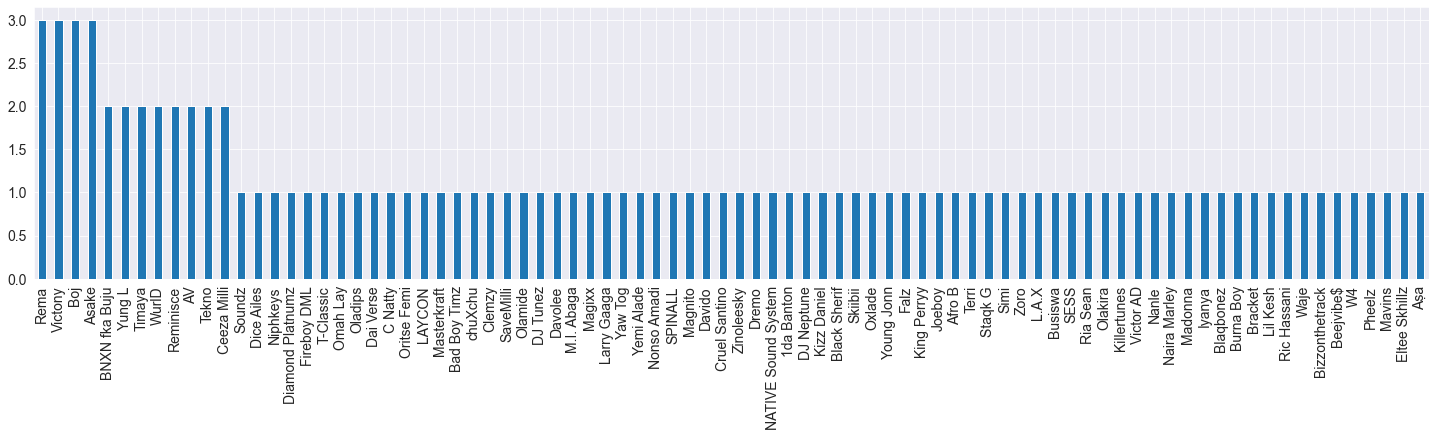

In [87]:
data_spotify['Artist_Name'].value_counts().plot( kind='bar',figsize=(25,5))

# Exploring Features Disribution

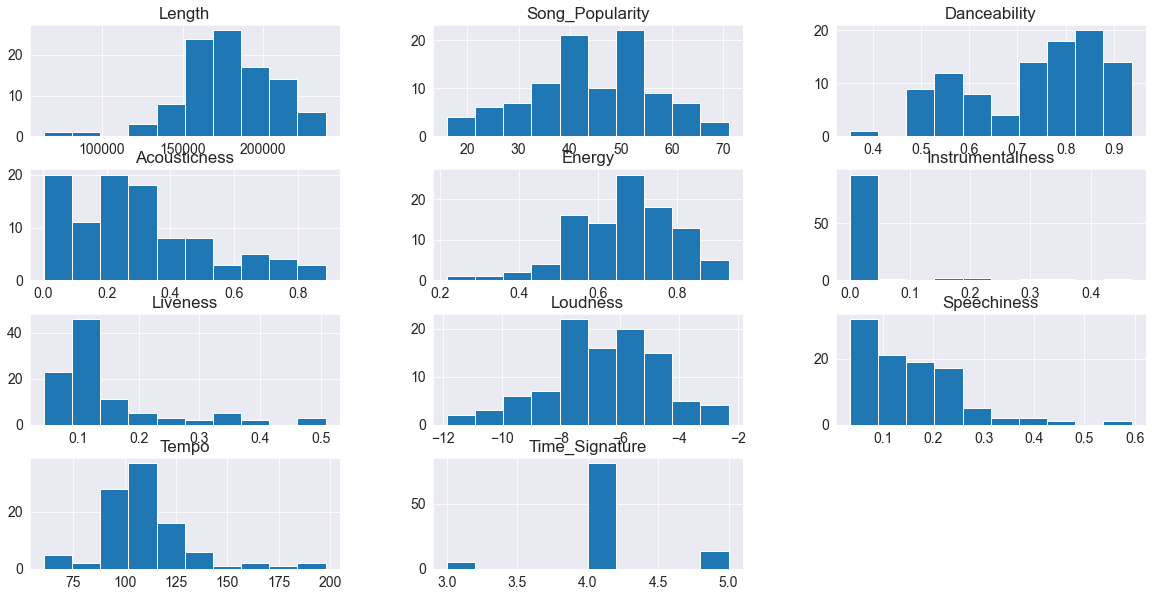

In [88]:
data_spotify.hist(figsize=(20,10));

# Feature Correlation

In [89]:
data_spotify.corr()

,Length,Song_Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_Signature
Length,1.000000,0.240171,-0.153633,-0.182157,0.074592,-0.128606,-0.111534,-0.039853,-0.172635,0.062730,0.048581
Song_Popularity,0.240171,1.000000,0.158066,-0.076001,-0.032046,-0.057419,-0.135033,-0.073995,-0.202782,0.084377,0.012950
Danceability,-0.153633,0.158066,1.000000,-0.201473,0.128580,0.129162,0.039659,-0.138430,-0.249382,-0.085514,-0.218813
Acousticness,-0.182157,-0.076001,-0.201473,1.000000,-0.233657,-0.048634,0.125696,0.068490,0.179211,-0.039851,-0.062637
Energy,0.074592,-0.032046,0.128580,-0.233657,1.000000,0.159866,-0.032630,0.469414,-0.171488,0.206648,-0.065234
Instrumentalness,-0.128606,-0.057419,0.129162,-0.048634,0.159866,1.000000,-0.009416,-0.058329,-0.124778,-0.032168,-0.056241
Liveness,-0.111534,-0.135033,0.039659,0.125696,-0.032630,-0.009416,1.000000,-0.056697,0.076776,-0.127654,0.114803
Loudness,-0.039853,-0.073995,-0.138430,0.068490,0.469414,-0.058329,-0.056697,1.000000,0.054480,0.023766,-0.117569
Speechiness,-0.172635,-0.202782,-0.249382,0.179211,-0.171488,-0.124778,0.076776,0.054480,1.000000,0.192540,0.164510
Tempo,0.062730,0.084377,-0.085514,-0.039851,0.206648,-0.032168,-0.127654,0.023766,0.192540,1.000000,0.036604


# References

[Spotify](https://en.wikipedia.org/wiki/Spotify)

[Towardsdatascience](https://towardsdatascience.com/country-wise-visual-analysis-of-music-taste-using-spotify-api-seaborn-in-python-77f5b749b421b)

[Kaggle](https://www.kaggle.com/datasets/sootersaalu/nigerian-songs-spotify)

[Spotify Playlist](https://open.spotify.com/playlist/37i9dQZF1DWZCOSaet9tpB)

[Morioh](https://morioh.com/p/31b8a607b2b0)